I have used Google's Colab Notebook to implement this project. The working directory for coloab is the "Content" folder. We can see the available folder structure from clicking on the folder icon on the left.There we can upload files from our local system.

In [0]:
import os
import zipfile

local_zip_train = 'Train_Test_Data.zip'
zip_ref_train = zipfile.ZipFile(local_zip_train, 'r')
zip_ref_train.extractall('Presence_of_Cellphone') #extracting the zip file and putting it in folder named 'Presence_of_Cellphone_Train' 
zip_ref_train.close()


Let's create directories for both type of images and see the total number of images in the respective directories

In [28]:
# Training directory with our Mobile pictures
train_cellphone_yes = os.path.join('Presence_of_Cellphone/Training_Data/YES')

# Training directory with our No Mobile pictures
train_cellphone_no = os.path.join('Presence_of_Cellphone/Training_Data/No')

# Testing directory with our Mobile pictures
test_cellphone_yes = os.path.join('Presence_of_Cellphone/Testing_Data/YES')

# Testing directory with our No Mobile pictures
test_cellphone_no = os.path.join('Presence_of_Cellphone/Testing_Data/No')

print("Total no of Training images where cellphone is present: ",len(os.listdir(train_cellphone_yes)))
print("Total no of Training images where cellphone is not present: ",len(os.listdir(train_cellphone_no)))

print("Total no of Testing images where cellphone is present: ",len(os.listdir(test_cellphone_yes)))
print("Total no of Testing images where cellphone is not present: ",len(os.listdir(test_cellphone_no)))


Total no of Training images where cellphone is present:  139
Total no of Training images where cellphone is not present:  61
Total no of Testing images where cellphone is present:  51
Total no of Testing images where cellphone is not present:  17


<h2>Lets Build the model now</h2>

Let's start by importing the necessary TensorFlow libraries

In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

<h3>Building the CNN</h3> 

Now we will be building the densely connected Convolutional Neural Network. TensorFlow helps us to build this neural network as connected sequential layers and also let us resize the images as per our requirement during the operation.

In [0]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),  
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512,activation='relu'),
tf.keras.layers.Dense(1,activation='sigmoid')
])

<h3>'summary()' Method</h3>

From the 'summary()' method we can see how the the image shape has been changed/reduced after the operation in every layer. 

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)       

<h3>Compiling the model</h3>

As we are designing a Binary classifier,we have used 'binary_crossentropy' loss function. But we can use other loss functions to see how it impacts the model performance.

In [0]:

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

<h3>Data Augmentation: Where the Magic Happens</h3>

1.'ImageDataGenerator' helps to augment the image data which expands the training the dataset. It is particulary helpful where there's not much training data available.

2.'flow_from_directory' function of the *ImageDataGenerator* helps to label the data from the subdirectory name.

3.So we don't need to label evry data by ourselves explicitly. We just point the directory which holds the subdirectories which intern holds the images of respective classes.  

In [33]:
TRAINING_DIR = 'Presence_of_Cellphone/Training_Data'
VALIDATION_DIR = 'Presence_of_Cellphone/Testing_Data'

train_datagen = ImageDataGenerator(rescale=1/255,            #normalizes the data before feeding to the netwrok
                                   rotation_range=40,        # on a scale of 0-180 degree, it rotates the image for 40 degree
                                   width_shift_range=0.2,    # In shifts the image width wise in the image frame for 20%
                                   height_shift_range=0.2,   # In shifts the image height wise in the image frame for 20%
                                   shear_range=0.2,          # In simple workd it creates a tilting efffect on the image 
                                   zoom_range=0.2,           #it zooms the image 20%
                                   horizontal_flip=True,     #it creates a mirror effect on the image 
                                   fill_mode='nearest')

# TRAIN GENERATOR.
train_generator = train_datagen.flow_from_directory(
                        TRAINING_DIR,
                        target_size=(150,150),
                        batch_size=20,
                        class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1/255)

# VALIDATION GENERATOR.
validation_generator = validation_datagen.flow_from_directory(
                        VALIDATION_DIR,
                        target_size=(150,150),
                        batch_size=17,
                        class_mode='binary')





Found 200 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


<h3>Trainging the Model</h3>

Now we have developed the model,it's time to train it. 'model.fit()' helps us to do so.

In [34]:
history = model.fit(
      train_generator,
      validation_data = validation_generator,
      steps_per_epoch=10,
      epochs=15,               # steps_per_epoch = total training sample/batch size
      validation_steps = 4,
      verbose=1)               # Different modes of showing progress bar. Verbosity mode 0 = silent, 1 = progress bar, 2 = one line per epoch

Epoch 1/15
10/10 [==============================] - 2s 238ms/step - loss: 0.7152 - accuracy: 0.6400 - val_loss: 0.6254 - val_accuracy: 0.7500
Epoch 2/15
10/10 [==============================] - 2s 231ms/step - loss: 0.6210 - accuracy: 0.6950 - val_loss: 0.5875 - val_accuracy: 0.7647
Epoch 3/15
10/10 [==============================] - 2s 233ms/step - loss: 0.6231 - accuracy: 0.6950 - val_loss: 0.5773 - val_accuracy: 0.7500
Epoch 4/15
10/10 [==============================] - 2s 229ms/step - loss: 0.6856 - accuracy: 0.6850 - val_loss: 0.6235 - val_accuracy: 0.6912
Epoch 5/15
10/10 [==============================] - 2s 233ms/step - loss: 0.5638 - accuracy: 0.7050 - val_loss: 0.6261 - val_accuracy: 0.7353
Epoch 6/15
10/10 [==============================] - 2s 228ms/step - loss: 0.6285 - accuracy: 0.6900 - val_loss: 0.6105 - val_accuracy: 0.7647
Epoch 7/15
10/10 [==============================] - 2s 232ms/step - loss: 0.5593 - accuracy: 0.6850 - val_loss: 0.5397 - val_accuracy: 0.7500
Epoch 

<h3>PLOT LOSS AND ACCURACY</h3>

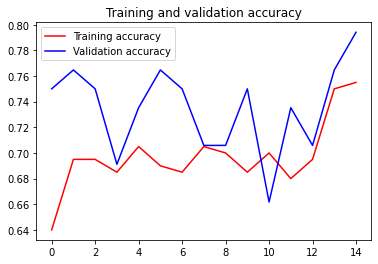

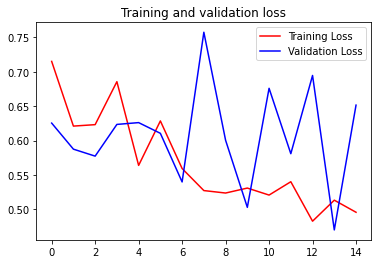

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


<h3>Now Let's see how the model works on Unseen photos</h3>

Saving IMG_20200427_105047.jpg to IMG_20200427_105047.jpg
[1.]
IMG_20200427_105047.jpg There is a Mobile


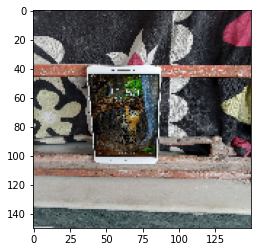

In [26]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    plt.imshow(img)
    print(fn + " There is a Mobile")
  else:
    plt.imshow(img)
    print(fn + " No Mobile")

In [0]:
!rm -rf Presence_of_Cellphone_Train